<a href="https://colab.research.google.com/github/Salwalabibah/PCVK_Genap_2023/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Template matching**

menggunakan library openCV:
cv.matchTamplate(), dengan parameter


*   **Image**: citra input
*   **templ**: template yang dicari, ukurannya tidak boleh lebih besar dan citra input
*   **method**: metode dari template matching

Jenis method template matching di OpenCV:


1.   TM_SQDIFF
2.   TM_SQDIFF_NORMED
3.   TM_CCORR
4.   TM_CCORR_NORMED
5.   TM_CCOEFF
6.   TM_CCOEFF_NORMED


# **TM_SQDIFF**

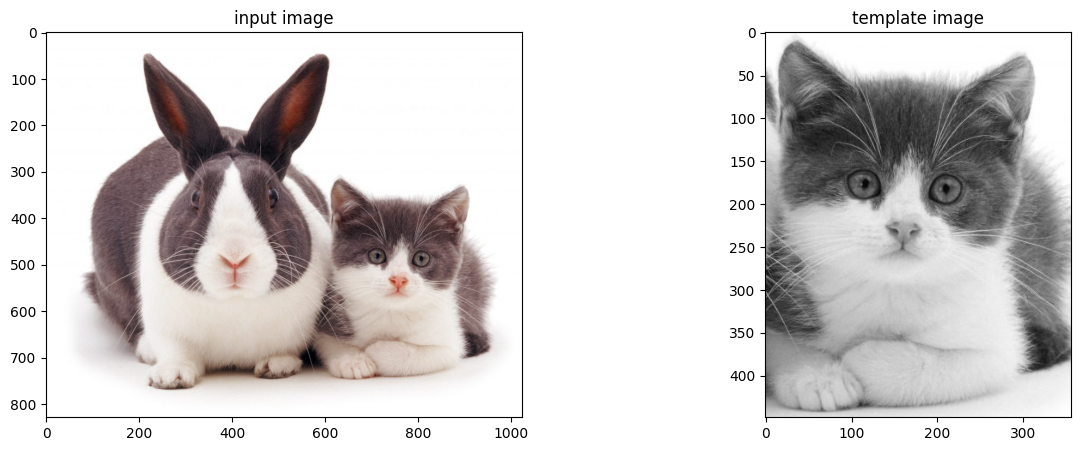

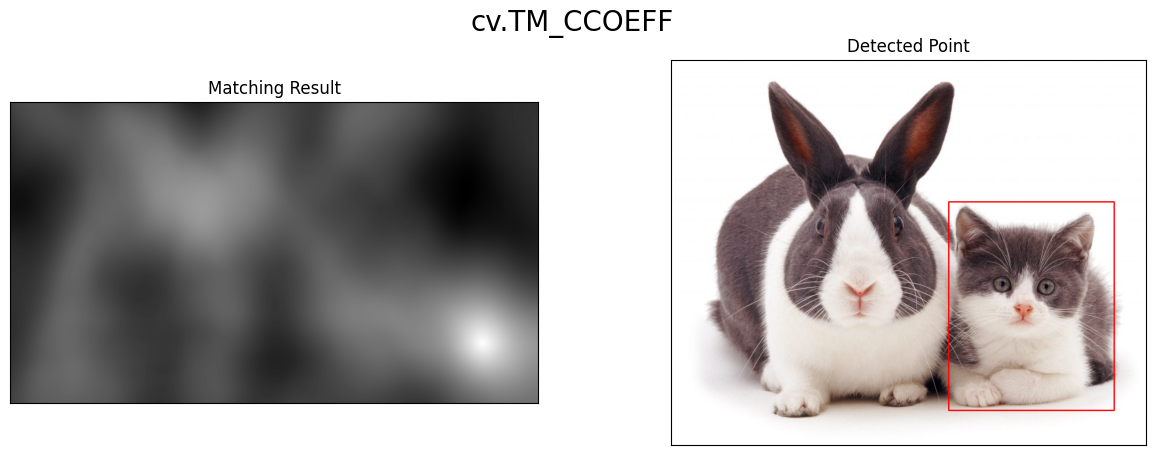

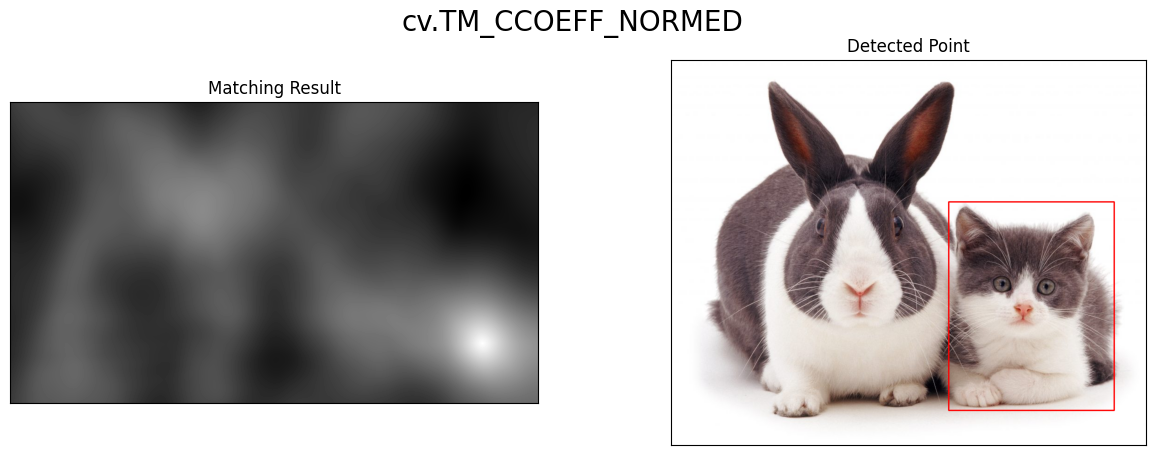

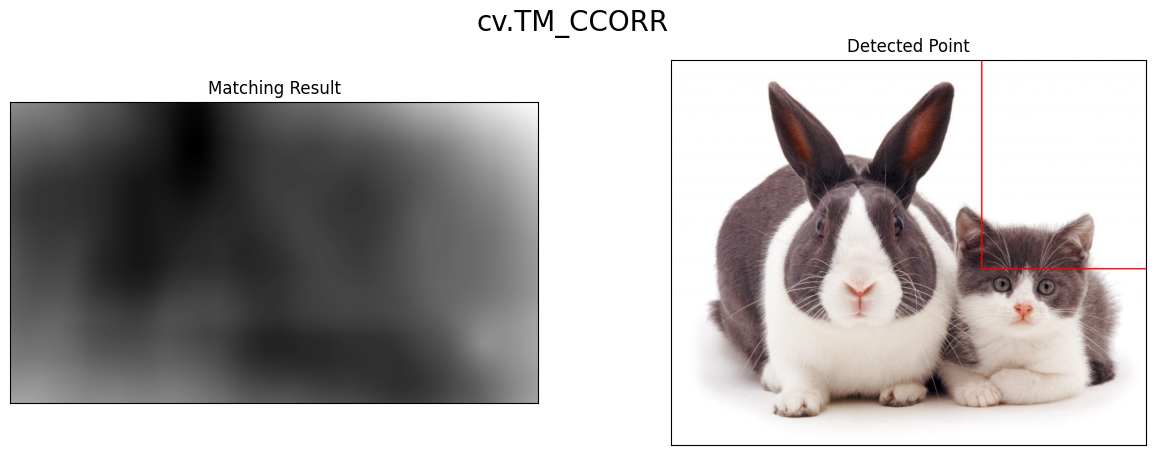

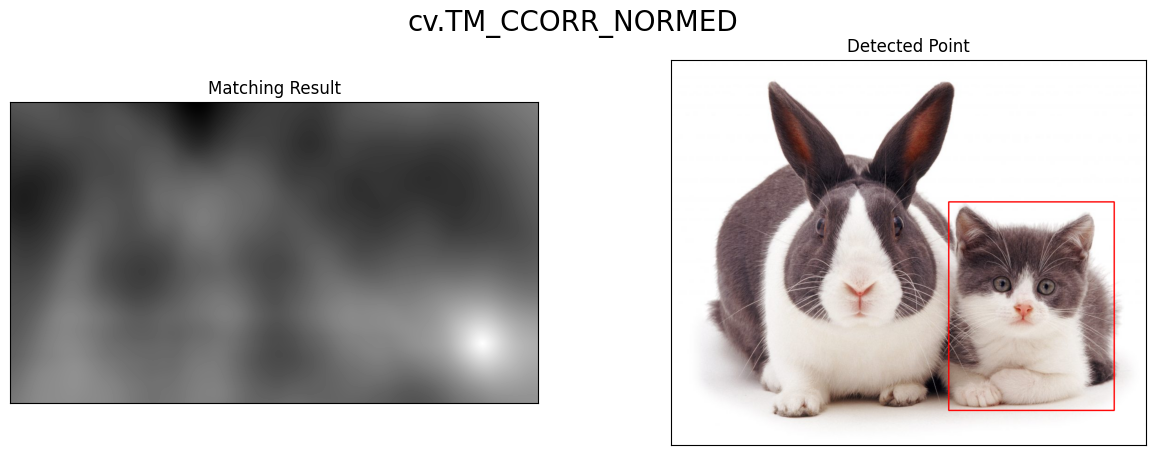

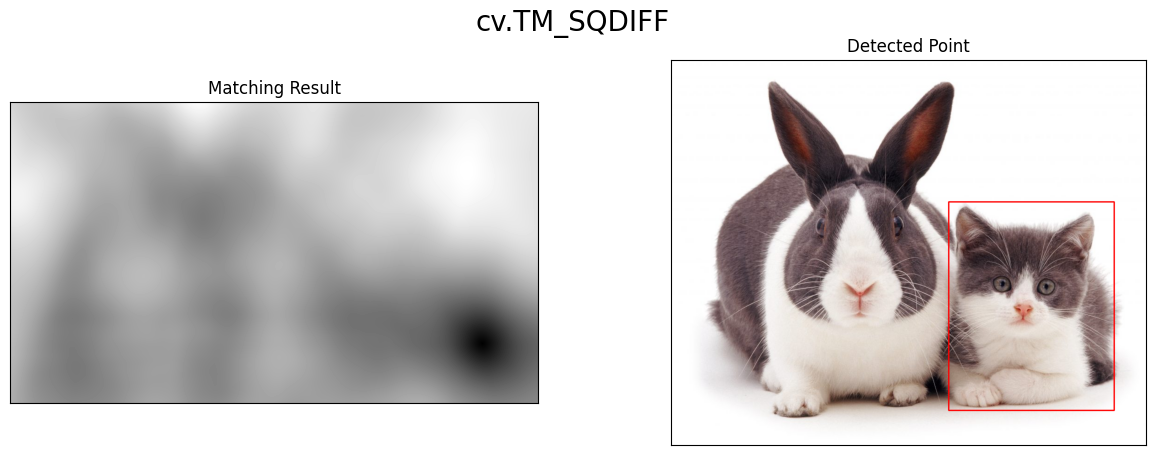

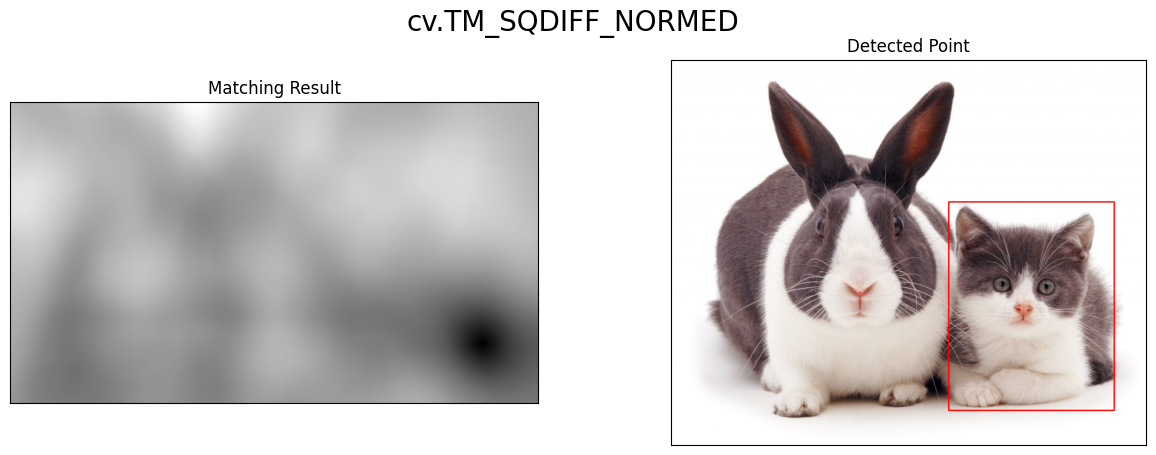

In [28]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/Image Detection/cats_and_bunnies.jpg')
templ = cv.imread('/content/drive/MyDrive/PCVK/img/Image Detection/cat2_templatejpg.jpg', 0)
img2 = img.copy()

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# templ_gray = cv.cvtColor(templ, cv.COLOR_BGR2GRAY)

w, h = templ.shape[::-1]

f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("input image")
ax[1].imshow(cv.cvtColor(templ, cv.COLOR_BGR2RGB))
ax[1].set_title("template image")
plt.show()

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
  img = img2.copy()
  method = eval(meth)
  # Apply template Matching
  result = cv.matchTemplate(img_gray, templ, method)
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

  if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc

  bottom_right = (top_left[0] + w, top_left[1] + h)

  cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 2)
  plt.figure(figsize=(15,5))
  plt.subplot(121),plt.imshow(result,cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  print("\n\n")
  plt.suptitle(meth, fontsize=20)
  plt.show()